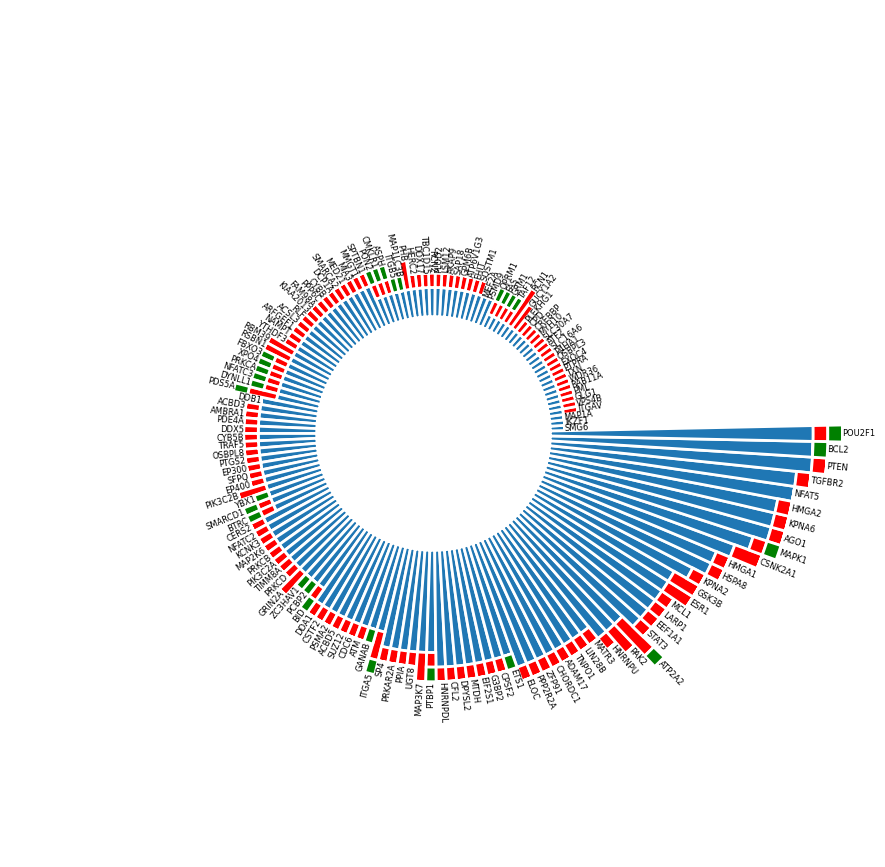

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset
df=pd.read_csv('HIV_Synergism.csv')

# print(df.columns)
# Build a dataset

# Reorder the dataframe
df = df.sort_values(by=[' Up-regulated HIV-hDEmiRs','Experimentally validated HIV-miRs','Predicted HIV-miRs'],ascending = [True, True,True])

# initialize the figure
plt.figure(figsize=(15,11))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 10
lowerLimit = 8
labelPadding = 1

# Compute max and min in the dataset
max1 =df[' Up-regulated HIV-hDEmiRs'].max()
max2=df['Experimentally validated HIV-miRs'].max()
max3=df['Predicted HIV-miRs'].max()
max=max1+max2+max3
# print(max)
# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df['Experimentally validated HIV-miRs']+ slope * df[' Up-regulated HIV-hDEmiRs']+slope *df['Predicted HIV-miRs']+ lowerLimit
# print(heights)

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars

bars = ax.bar(
    x=angles, 
    height=df[' Up-regulated HIV-hDEmiRs'], 
    width=width,
    linewidth=2,
    color=None,
bottom=lowerLimit,
    edgecolor='white' )

bars = ax.bar(
    x=angles, 
    height=df['Predicted HIV-miRs'], 
    width=width,
    linewidth=2,
    color='red',
bottom=lowerLimit+df[' Up-regulated HIV-hDEmiRs'],
    edgecolor='white' )

bars = ax.bar(
    x=angles, 
    height=df['Experimentally validated HIV-miRs'], 
    width=width,
    linewidth=2,
    color='green',
bottom=lowerLimit+df['Predicted HIV-miRs']+df[' Up-regulated HIV-hDEmiRs'],
    edgecolor='white' )

# Add labels
for bar, angle, height, label, total in zip(bars,angles, heights, df['Target mRNA'],df['Total']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=total+lowerLimit, 
        s=label, 
        ha=alignment, 
        va='center',
        rotation=rotation,fontsize=6, 
        rotation_mode="anchor")


In [3]:
plt.savefig('final.png')

<Figure size 640x480 with 0 Axes>